In [4]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ElectricityConsumptionDataset/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ElectricityConsumptionDataset/test.csv')

print(train_data.head())
print(test_data.head())

   ID             datetime  temperature  var1  pressure  windspeed var2  \
0   0  2013-07-01 00:00:00        -11.4 -17.1    1003.0    571.910    A   
1   1  2013-07-01 01:00:00        -12.1 -19.3     996.0    575.040    A   
2   2  2013-07-01 02:00:00        -12.9 -20.0    1000.0    578.435    A   
3   3  2013-07-01 03:00:00        -11.4 -17.1     995.0    582.580    A   
4   4  2013-07-01 04:00:00        -11.4 -19.3    1005.0    586.600    A   

   electricity_consumption  
0                    216.0  
1                    210.0  
2                    225.0  
3                    216.0  
4                    222.0  
    ID             datetime  temperature  var1  pressure  windspeed var2
0  552  2013-07-24 00:00:00        -10.0 -16.4    1011.0    263.280    A
1  553  2013-07-24 01:00:00        -10.0 -20.7    1011.0    267.175    A
2  554  2013-07-24 02:00:00        -10.7 -17.1    1003.0    269.555    A
3  555  2013-07-24 03:00:00        -13.6 -20.7    1008.0    273.060    A
4  556  20

In [7]:
train_data['var2'] = train_data['var2'].astype('category').cat.codes
test_data['var2'] = test_data['var2'].astype('category').cat.codes

train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['hour'] = train_data['datetime'].dt.hour
train_data['day'] = train_data['datetime'].dt.day
train_data['month'] = train_data['datetime'].dt.month
train_data['year'] = train_data['datetime'].dt.year

test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data['hour'] = test_data['datetime'].dt.hour
test_data['day'] = test_data['datetime'].dt.day
test_data['month'] = test_data['datetime'].dt.month
test_data['year'] = test_data['datetime'].dt.year

print(train_data.head())
print(test_data.head())

   ID            datetime  temperature  var1  pressure  windspeed  var2  \
0   0 2013-07-01 00:00:00        -11.4 -17.1    1003.0    571.910     0   
1   1 2013-07-01 01:00:00        -12.1 -19.3     996.0    575.040     0   
2   2 2013-07-01 02:00:00        -12.9 -20.0    1000.0    578.435     0   
3   3 2013-07-01 03:00:00        -11.4 -17.1     995.0    582.580     0   
4   4 2013-07-01 04:00:00        -11.4 -19.3    1005.0    586.600     0   

   electricity_consumption  hour  day  month  year  
0                    216.0     0    1      7  2013  
1                    210.0     1    1      7  2013  
2                    225.0     2    1      7  2013  
3                    216.0     3    1      7  2013  
4                    222.0     4    1      7  2013  
    ID            datetime  temperature  var1  pressure  windspeed  var2  \
0  552 2013-07-24 00:00:00        -10.0 -16.4    1011.0    263.280     0   
1  553 2013-07-24 01:00:00        -10.0 -20.7    1011.0    267.175     0   
2  

In [17]:
X_train = train_data.drop(['ID', 'datetime', 'electricity_consumption'], axis=1)
y_train = train_data['electricity_consumption']
X_test = test_data.drop(['ID', 'datetime'], axis=1)

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  r2_score

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
r2_mean = r2_scores.mean()

print(f'Ortalama R^2: {r2_mean}')


Ortalama R^2: 0.3319914268417672


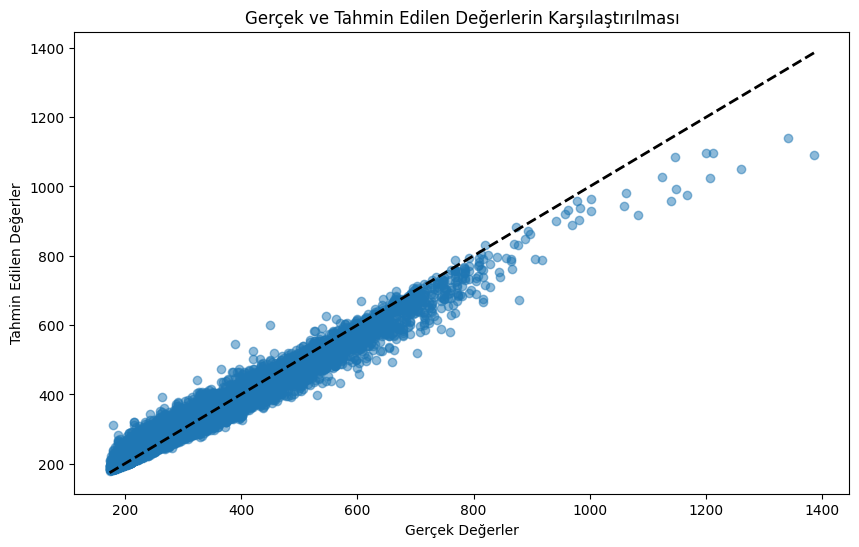

In [28]:
import matplotlib.pyplot as plt

train_predictions = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.show()

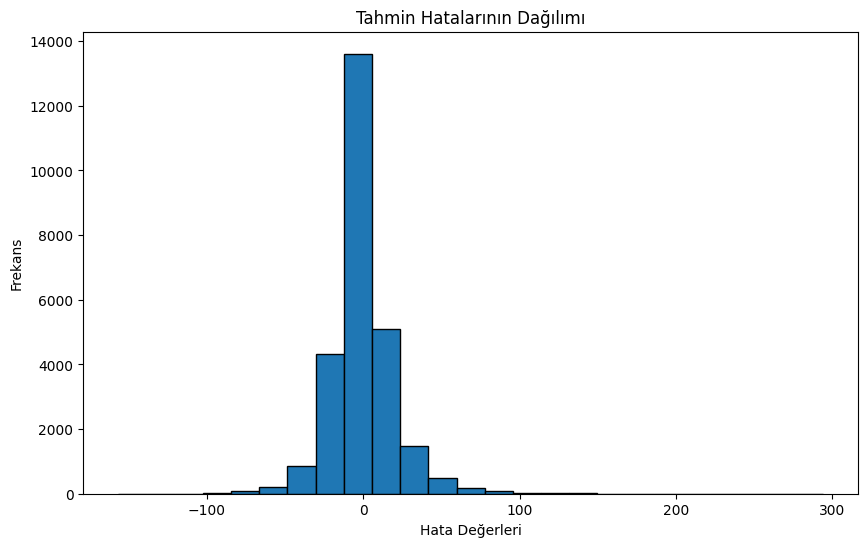

In [29]:
errors = y_train - train_predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, edgecolor='black')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.title('Tahmin Hatalarının Dağılımı')
plt.show()

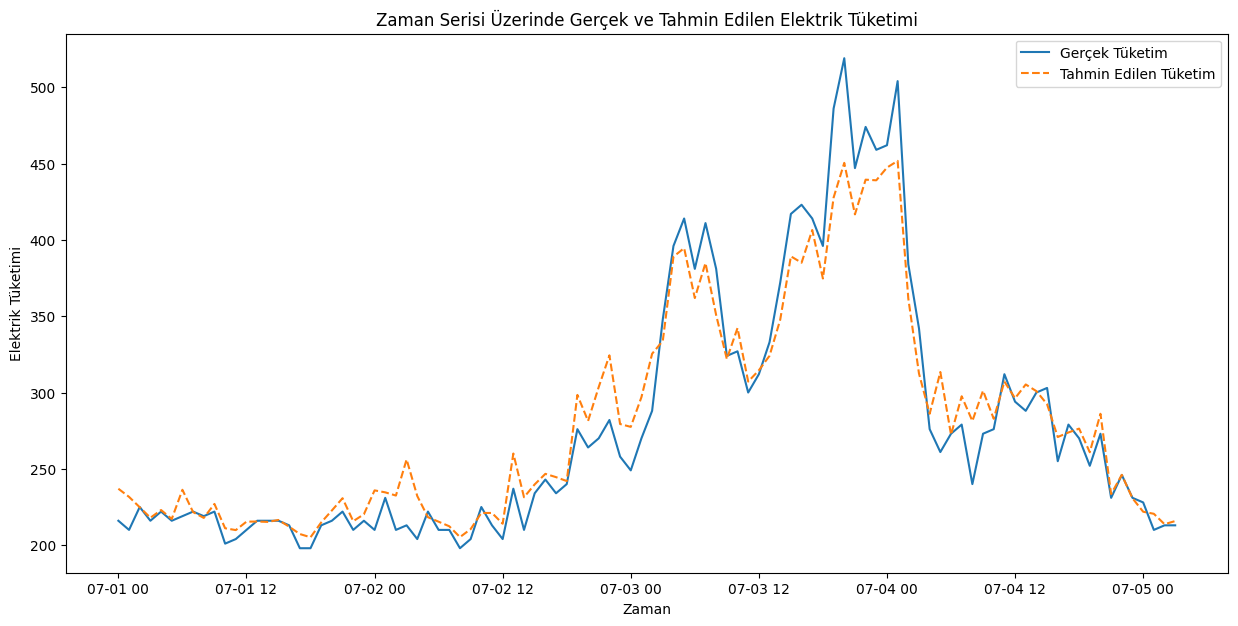

In [31]:
sample_data = train_data.iloc[:100]
sample_predictions = model.predict(X_train.iloc[:100])

plt.figure(figsize=(15, 7))
plt.plot(sample_data['datetime'], sample_data['electricity_consumption'], label='Gerçek Tüketim')
plt.plot(sample_data['datetime'], sample_predictions, label='Tahmin Edilen Tüketim', linestyle='--')
plt.xlabel('Zaman')
plt.ylabel('Elektrik Tüketimi')
plt.title('Zaman Serisi Üzerinde Gerçek ve Tahmin Edilen Elektrik Tüketimi')
plt.legend()
plt.show()
